# Synthetic bifurcation

We simulated a differentiation process over a bifurcation fork. In this simulation, 
cells are barcoded in the beginning, and the barcodes remain un-changed. In the simulation we resample clones over time. The first sample is obtained after 5 cell cycles post labeling. The dataset has two time points. See Wang et al. (2021) for more details.   

In [1]:
import cospar as cs

In [2]:
cs.logging.print_version()
cs.settings.verbosity=2
cs.settings.set_figure_params(format='png',dpi=75,fontsize=14) # use png to reduce file size. 

Running cospar 0.2.0 (python 3.8.12) on 2022-02-07 22:07.


In [3]:
cs.settings.data_path='test' # A relative path to save data. If not existed before, create a new one.
cs.settings.figure_path='test' # A relative path to save figures. If not existed before, create a new one.


## Loading data

In [4]:
adata_orig=cs.datasets.synthetic_bifurcation()

In [5]:
adata_orig.obsm['X_clone']

<2474x52 sparse matrix of type '<class 'numpy.float64'>'
	with 2474 stored elements in Compressed Sparse Row format>

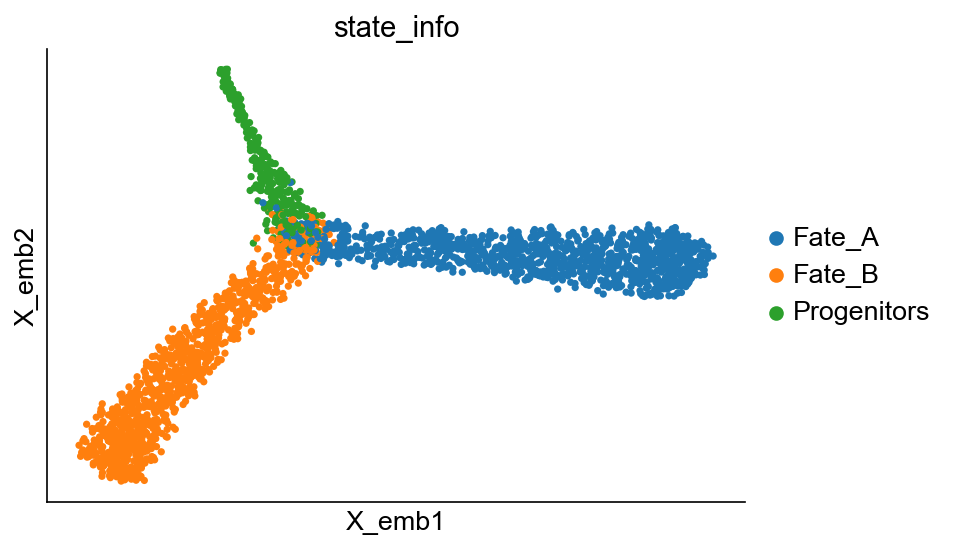

In [6]:
cs.pl.embedding(adata_orig,color='state_info')

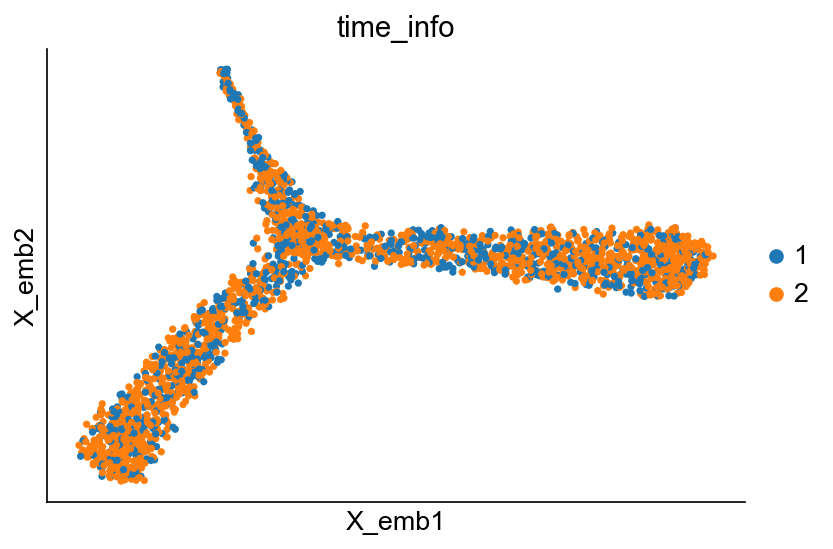

In [7]:
cs.pl.embedding(adata_orig,color='time_info')

## Basic clonal analysis

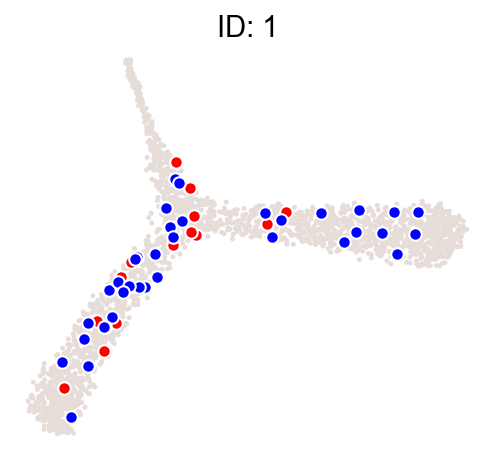

In [8]:
cs.pl.clones_on_manifold(adata_orig,selected_clone_list=[1])

Results saved as dictionary at adata.uns['fate_coupling_X_clone']


<AxesSubplot:title={'center':'source: X_clone'}>

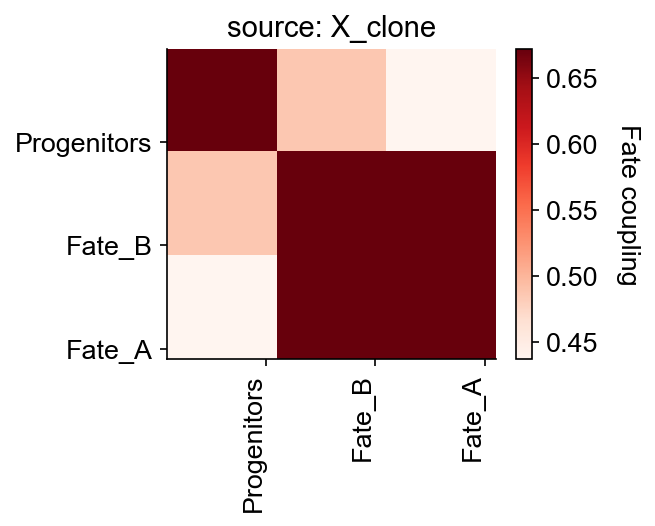

In [9]:
cs.tl.fate_coupling(adata_orig,source='X_clone') 
cs.pl.fate_coupling(adata_orig,source='X_clone') 

Data saved at adata.uns['barcode_heatmap']


<AxesSubplot:>

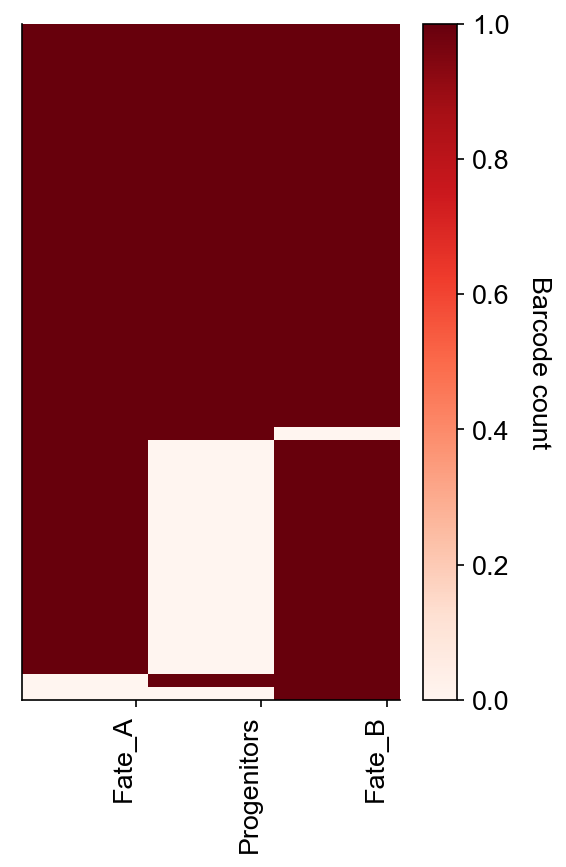

In [10]:
cs.pl.barcode_heatmap(adata_orig,selected_times='2', color_bar=True,binarize=True)

100%|██████████| 52/52 [00:00<00:00, 254.70it/s]


Data saved at adata.uns['clonal_fate_bias']


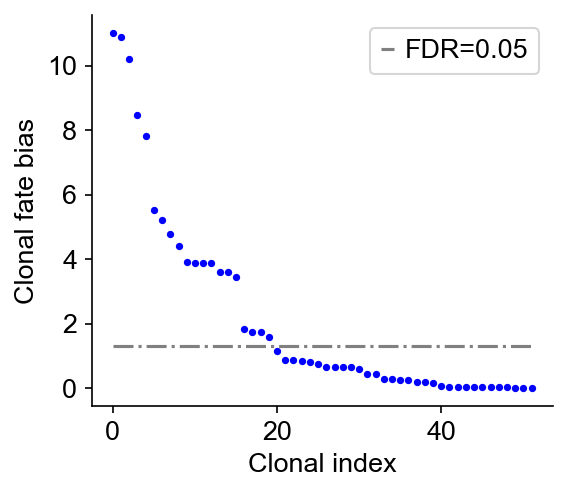

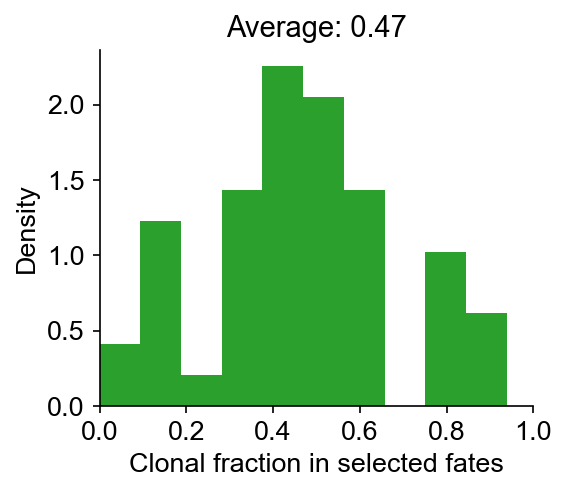

In [11]:
cs.tl.clonal_fate_bias(adata_orig,selected_fate='Fate_A',alternative='two-sided')
cs.pl.clonal_fate_bias(adata_orig) 

## Transition map inference

### Transition map from multiple clonal time points.

In [12]:
adata=cs.tmap.infer_Tmap_from_multitime_clones(adata_orig,clonal_time_points=['1','2'],smooth_array=[10,10,10],
            CoSpar_KNN=20,sparsity_threshold=0.2)

------Compute the full Similarity matrix if necessary------
----Infer transition map between neighboring time points-----
Step 1: Select time points
Number of multi-time clones post selection: 52
Step 2: Optimize the transition map recursively
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=10
Iteration 2, Use smooth_round=10
Iteration 3, Use smooth_round=10
Convergence (CoSpar, iter_N=3): corr(previous_T, current_T)=0.96
-----------Total used time: 1.4379048347473145 s ------------


Results saved at adata.obs['fate_map_transition_map_XXX']
Results saved at adata.obs['fate_bias_transition_map_fateA*fateB']
selected_fates not specified. Using the first available pre-computed fate_bias


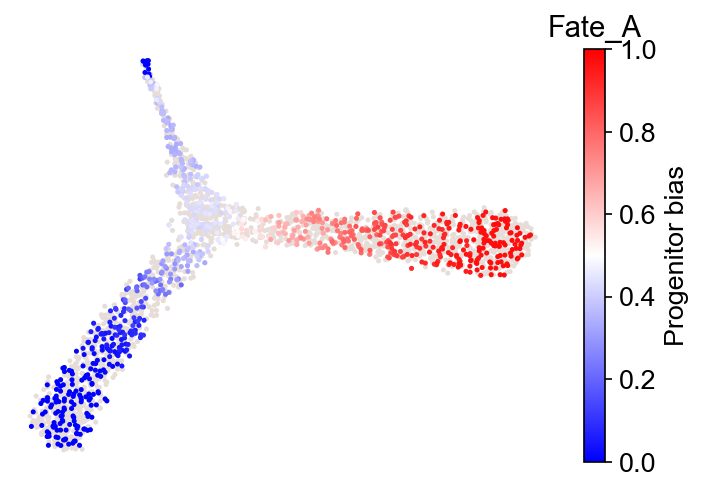

In [13]:
cs.tl.fate_bias(adata,selected_fates=['Fate_A','Fate_B'],source='transition_map')
cs.pl.fate_bias(adata,source='transition_map')

### Transition map from a single clonal time point

In [14]:
adata=cs.tmap.infer_Tmap_from_one_time_clones(adata_orig,initial_time_points=['1'],later_time_point='2',
    initialize_method='OT',smooth_array=[10,10,10],
                        sparsity_threshold=0.2,compute_new=False)

Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


--------Infer transition map between initial time points and the later time one-------
--------Current initial time point: 1--------
Step 0: Pre-processing and sub-sampling cells-------
Step 1: Use OT method for initialization-------
Load pre-computed shortest path distance matrix
Compute new custom OT matrix
Use uniform growth rate
OT solver: duality_gap
Finishing computing optial transport map, used time 3.3392720222473145
Step 2: Jointly optimize the transition map and the initial clonal states-------
-----JointOpt Iteration 1: Infer initial clonal structure
-----JointOpt Iteration 1: Update the transition map by CoSpar
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=10
Iteration 2, Use smooth_round=10
Iteration 3, Use smooth_round=10
Convergence (CoSpar, iter_N=3): corr(previous_T, current_T)=0.98
Convergence (JointOpt, iter_N=1): corr(previous_T, current_T)=0.094
Finishing Joint Optimization, used time 1.3652610778808594
-----------Total used time: 4.814281940460

Results saved at adata.obs['fate_map_transition_map_XXX']
Results saved at adata.obs['fate_bias_transition_map_fateA*fateB']
selected_fates not specified. Using the first available pre-computed fate_bias


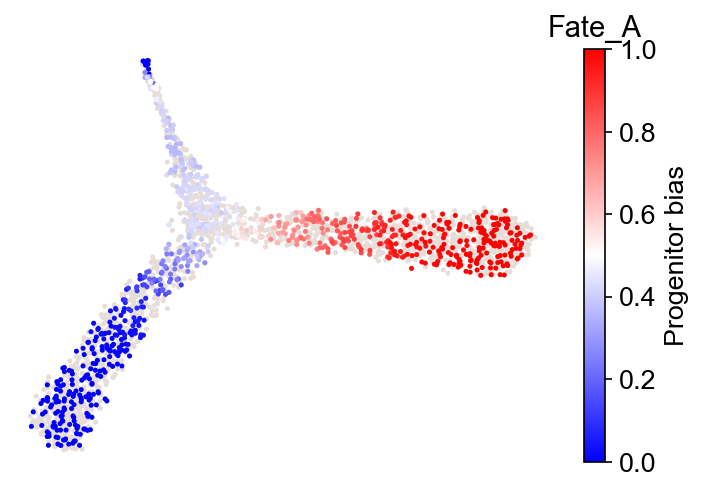

In [15]:
cs.tl.fate_bias(adata,selected_fates=['Fate_A','Fate_B'],source='transition_map')
cs.pl.fate_bias(adata,source='transition_map')

### Transition amp from only the clonal information

Infer transition map between neighboring time points.
Number of multi-time clones post selection: 52
Use all clones (naive method)
Results saved at adata.obs['fate_map_clonal_transition_map_XXX']
Results saved at adata.obs['fate_bias_clonal_transition_map_fateA*fateB']
selected_fates not specified. Using the first available pre-computed fate_bias


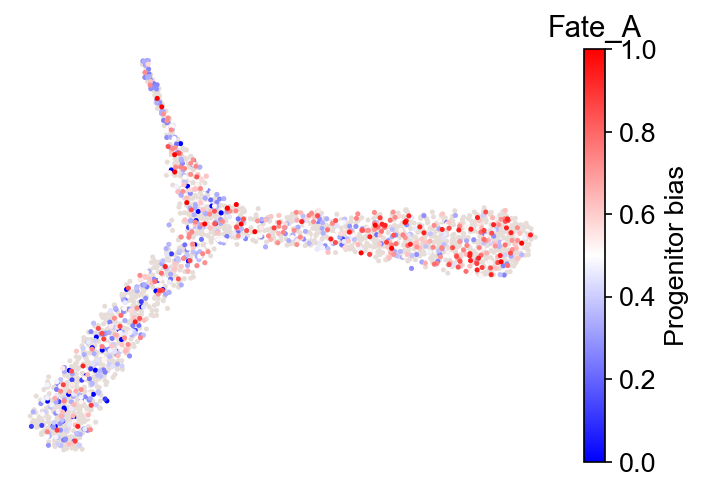

In [16]:
adata=cs.tmap.infer_Tmap_from_clonal_info_alone(adata_orig)

cs.tl.fate_bias(adata,selected_fates=['Fate_A','Fate_B'],source='clonal_transition_map')
cs.pl.fate_bias(adata,source='clonal_transition_map')